# Pymaceuticals Inc.
---

### Analysis

- Analysis by Leonid Lyakhovich Rutgers Data Science Boot Camp

- Reference: 
    https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
 

### Conclusions
  1. Capomulin was successful in having low tumor size
  2. Racine was more successful in having low tumor size than Capomulin
  3. With Capoulmin there is a high correlation between the weight of the mouse and the volume of its tummor

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how ="inner")

# Display the data table for preview
mice_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice. 

# Documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
# Using "nunique" as one mouse has multipule timepoint
mice_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Getting the unique ID of the Mice that has duplicate data and store in variable
duplicate = mice_data[mice_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# using Mice IDs and Timepoint combination to check for duplicates
mice_data[mice_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data_clean = mice_data[mice_data['Mouse ID'] != duplicate[0]]

In [6]:
# Checking the number of mice in the clean DataFrame.
# Assuming the data that goes with duplicate mice is not to be used
mice_data_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_regimen = mice_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medi_regimen = mice_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_regimen = mice_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_regimen = mice_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_regimen = mice_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
# Adding suffixes to help in renaming
summary_stats = pd.merge(pd.merge(pd.merge(pd.merge(
    mean_regimen,medi_regimen,on = "Drug Regimen",suffixes=["_mean","_median"])
              ,var_regimen,on = "Drug Regimen")
              ,std_regimen,on = "Drug Regimen")
              ,sem_regimen,on = "Drug Regimen")

# Renaming the columns
summary_stats = summary_stats.rename(columns = {
    "Tumor Volume (mm3)_mean" : "Mean Tumor Volume",
    "Tumor Volume (mm3)_median": "Median Tumor Volume",
    "Tumor Volume (mm3)_x" : "Tumor Volume Variance",
    "Tumor Volume (mm3)_y" : "Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)" : "Tumor Volume Std. Err."
})

# Display Results for all treatments
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a "single" line
summary_stats_advance = mice_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean","median","var","std","sem"]) # Passing the Statistics needed.

# Display Results for all treatments
summary_stats_advance

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

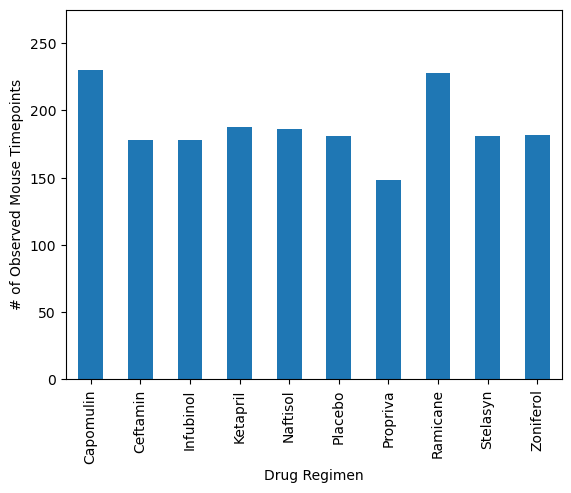

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# In Clean mice data: Group by the Drug Regiment, then look at time points to count them. Plot the results with options
bar_plot = mice_data_clean.groupby("Drug Regimen")["Timepoint"].count().plot(
        kind ='bar', ylabel = "# of Observed Mouse Timepoints", ylim =[0,275])


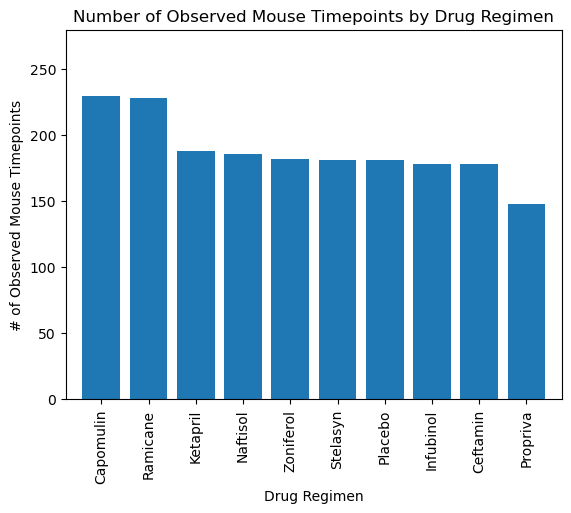

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of observations by drug regiment
observations = mice_data_clean["Drug Regimen"].value_counts()

# Make an axis label of length of number of observations
x_axis=np.arange(0, len(observations))

# plot and pass x and y data
plt.bar(x_axis,observations)

# make tick locations vector
tick_locations = [value for value in x_axis]

#pass the x ticks labels at tick locations with the name that is in index of observations, and rotate 90 degrees
plt.xticks(tick_locations, observations.index.values, rotation = 90)

# Customize the plot with title, x and y limits, and x and y labels
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Drug Regimen")
plt.ylim(0, max(observations)+50)
plt.ylabel("# of Observed Mouse Timepoints")

plt.title("Number of Observed Mouse Timepoints by Drug Regimen")

plt.show()

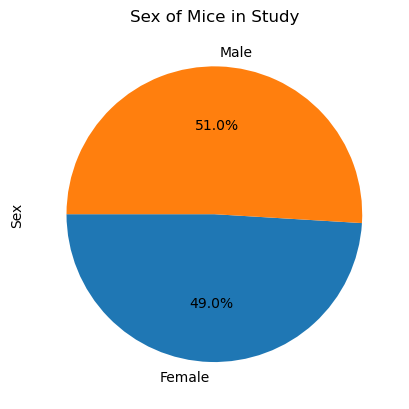

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
bar_plot = mice_data_clean.groupby("Sex")["Mouse ID"].count().plot(
        kind ='pie', title = "Sex of Mice in Study",
        ylabel = 'Sex', autopct ="%1.1f%%", startangle = 180)

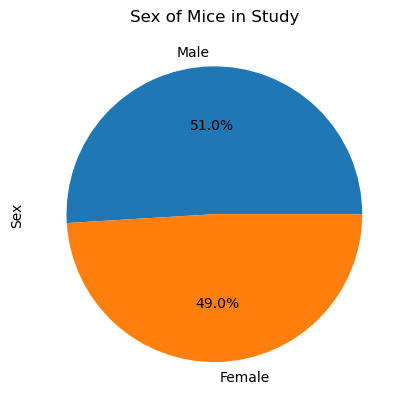

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = mice_data_clean["Sex"].value_counts()

plt.pie(sex_distribution, labels = ["Male","Female"], autopct ="%1.1f%%", startangle = 0)
plt.ylabel('Sex')
plt.title("Sex of Mice in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_measurement = mice_data_clean.groupby("Mouse ID")["Timepoint"].max()
last_measurement.reset_index()
last_measurement

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [14]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Meging Data on Mouse ID and Timepoint
mice_data_final = pd.merge(last_measurement, mice_data_clean , on=["Mouse ID","Timepoint"])
mice_data_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculating the IQR and quantitatively determine if there are any potential outliers for each treatment
for testTreament in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_vol_df = mice_data_final[mice_data_final['Drug Regimen'] == testTreament]['Tumor Volume (mm3)']
    
    #filling tumor vol data (for plotting)
    tumor_vol.append(temp_vol_df)
  
    # calculating statisics of the treatment that is being analzied 
    temp_quartiles= temp_vol_df.quantile([.25,.5,.75])
    temp_lowerq = temp_quartiles[0.25]
    temp_upperq = temp_quartiles[0.75]
    temp_iqr = temp_upperq - temp_lowerq
    temp_lower_bound = temp_lowerq - (1.5*temp_iqr)
    temp_upper_bound = temp_upperq + (1.5*temp_iqr)
    
    # Determine outliers using upper and lower bounds
    print(f"{testTreament}'s potential outliers: ",
         temp_vol_df[(temp_vol_df>temp_upper_bound) | (temp_vol_df<temp_lower_bound)])                                                


Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


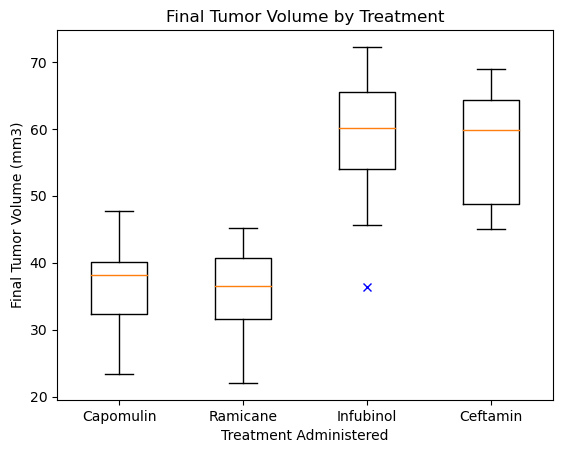

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax1 = plt.subplots()
bp = ax1.boxplot(tumor_vol, labels=treatments, sym='bx') # Customize Symbol and Color of outliers

plt.title("Final Tumor Volume by Treatment") #Title the Plot
plt.ylabel("Final Tumor Volume (mm3)") # label the y axis
plt.xlabel("Treatment Administered") # label the x axis

plt.show()

## Line and Scatter Plots

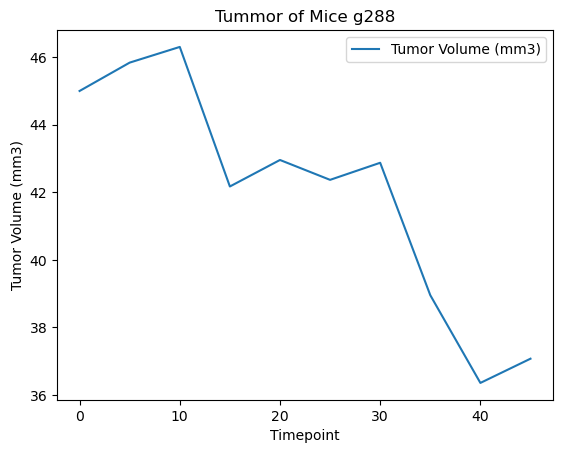

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# From Mice Dataframe Selection a Mouse then its Timepoints and Tumor Volumns for graphing
# Adding Titles and labels
mice_data[mice_data["Mouse ID"] == "g288"][["Timepoint","Tumor Volume (mm3)"]].plot(
    x="Timepoint",y="Tumor Volume (mm3)", title ="Tummor of Mice g288", ylabel= "Tumor Volume (mm3)")

plt.show()

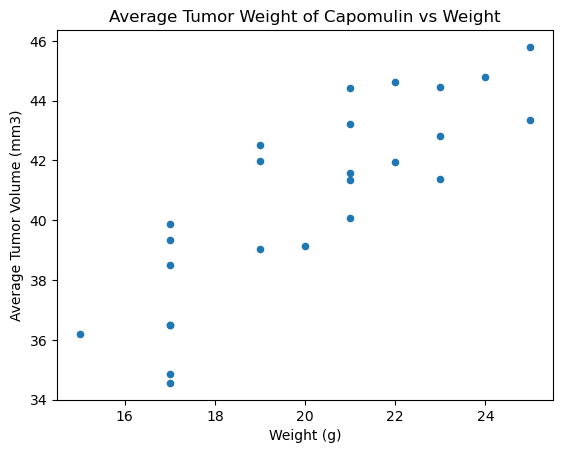

In [18]:
# Get a data frame of all data of mice who took Capoulim
Capomulin_df_all = mice_data[mice_data["Drug Regimen"] == "Capomulin"]
# Calculate the mean by Mouse ID.
# Calculating mean Tumor Volume and Weight(Mouse weight does not change so mean = value)
mean_capomulin = Capomulin_df_all.groupby(['Mouse ID'])[["Weight (g)","Tumor Volume (mm3)"]].mean()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin  regimen
mean_capomulin.plot.scatter(x= 'Weight (g)', y= 'Tumor Volume (mm3)')
plt.xlabel('Weight (g)') # Add X Label
plt.ylabel('Average Tumor Volume (mm3)') # Add Y Label
plt.title('Average Tumor Weight of Capomulin vs Weight') # Add Title
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# using scipy.stats library to calculate Pearson correlation coefficient and p-value
(r, p) = st.pearsonr(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'] )

print(f"The correlation between both factors is {round(r,2)}")


The correlation between both factors is 0.84


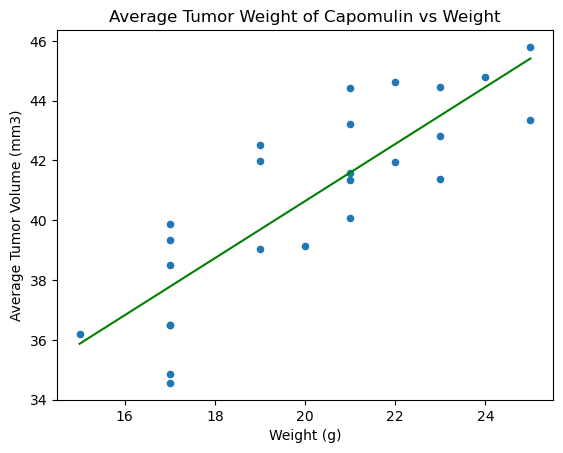

In [20]:
x = np.arange(mean_capomulin['Weight (g)'].min(),mean_capomulin['Weight (g)'].max()+1,1)

m, b = np.polyfit(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'] , deg=1)

# Copy from above
mean_capomulin.plot.scatter(x= 'Weight (g)', y= 'Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Weight of Capomulin vs Weight')

# cacliating and ploting line of best fit in green.
plt.plot(x, b + m * x, color ='g')

plt.show()